Task 1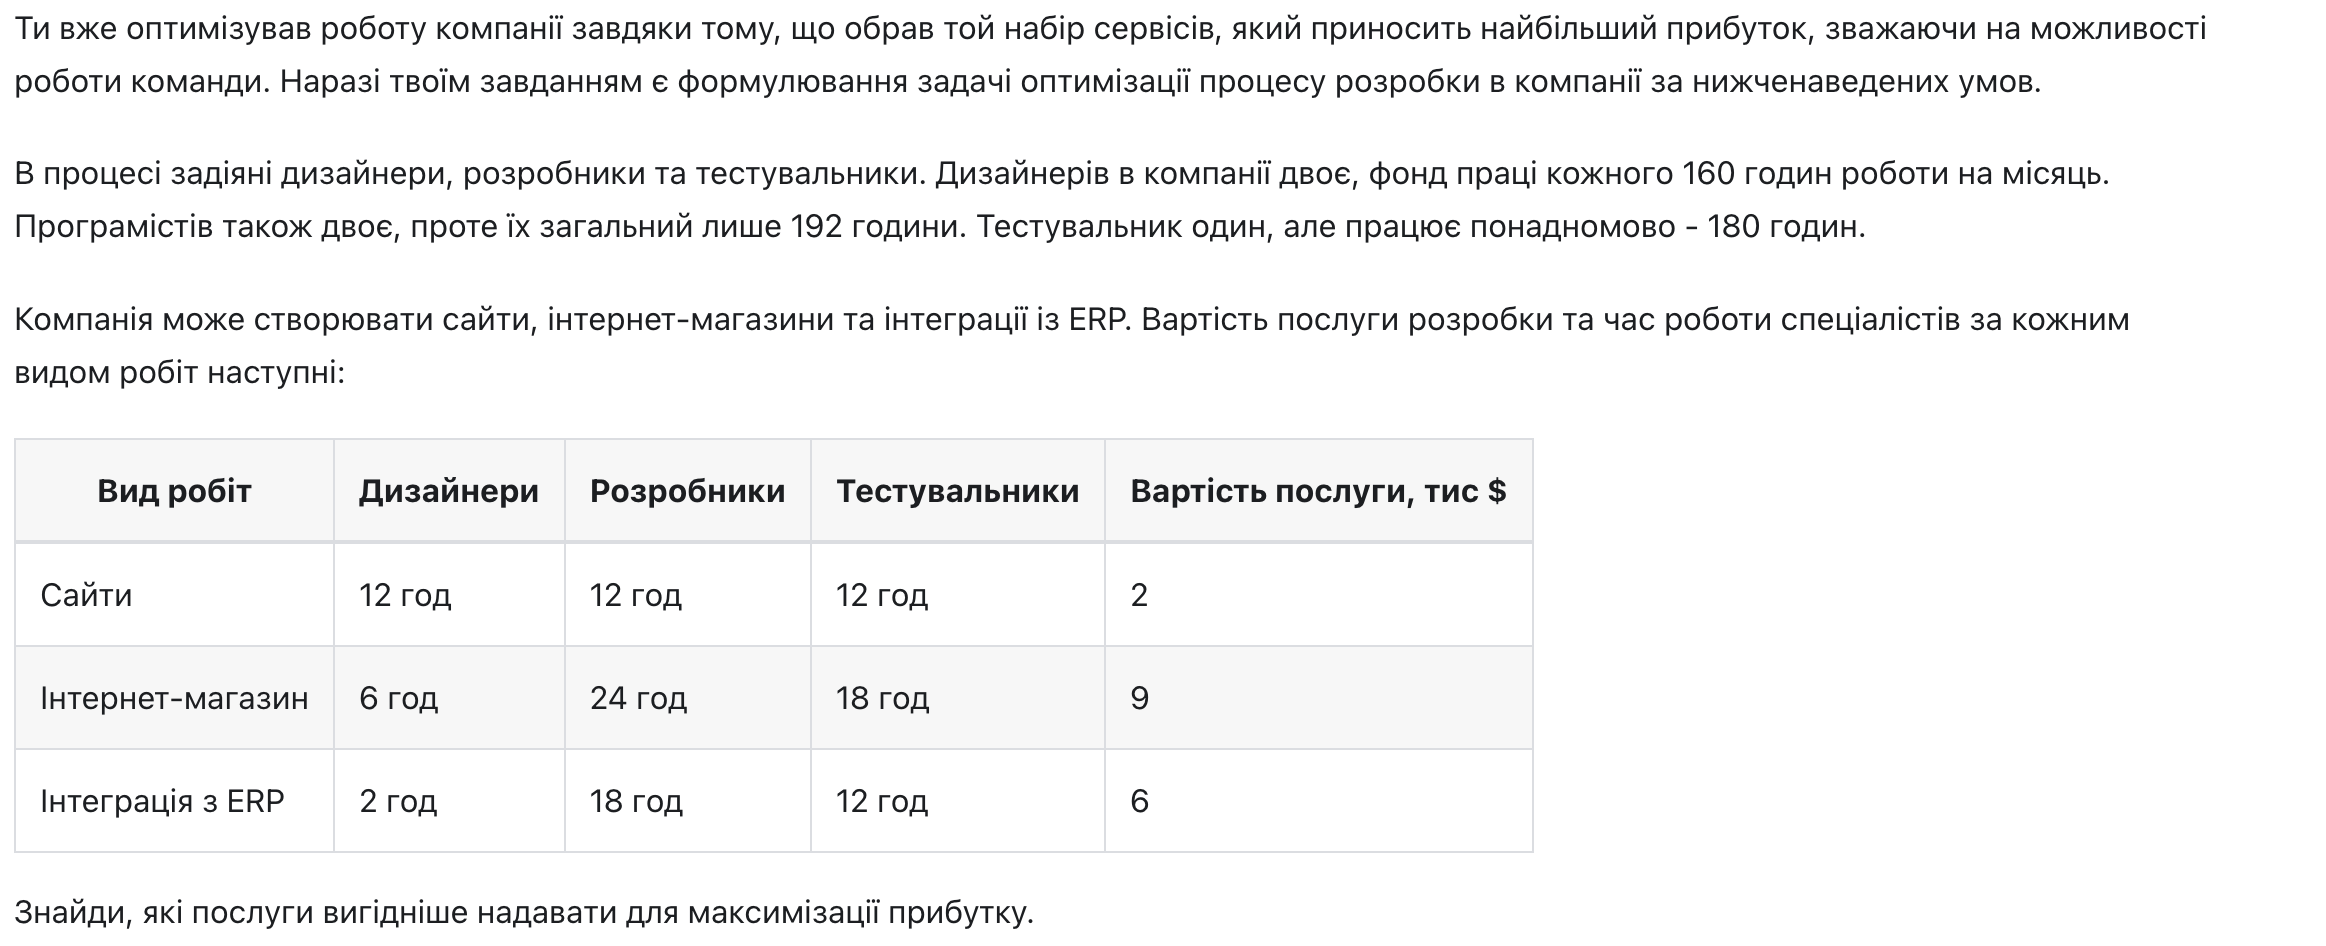

In [ ]:
# x1,x2,x3 - к-сть робіт на створення сайтів, інтернет магазинів та інтеграції з ERP

# 2*x1+9*x2+6*x3 --> max - цільова функція максимізації доходу

# обмеження
# 12*x1 + 6*x2 + 2*x3 <= 320  - обмеження по роботі двох дизайнерів
# 12*x1 + 24*x2 + 18*x3 <= 192  - обмеження по роботі двох розробників
# 12*x1 + 18*x2 + 12*x3 <= 180 обмеження по роботі одного тестувальника
# x1, x2, x3 >=0

from scipy.optimize import linprog

# for optimisation with scipy library we need to turn our function to the minimisation
# -2*x1-9*x2-6*x3 --> min

obj=[-2,-9,-6]

# matrix of coefficients
lhs_ineq=[[12,6,2],[12,24,18],[12,18,12]]

# matrix of the right values
rhs_ineq=[320,192,180]

# boundaries
bnd = [(0,float('inf')),(0,float('inf')),(0,float('inf')),]

# optimisation
optimisation= linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")

print(optimisation)
print('function: ', optimisation.fun)

print(optimisation.success)

print(optimisation.x)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -72.0
       x: [ 0.000e+00  8.000e+00  0.000e+00]
     nit: 1
function:  -72.0
True
[0. 8. 0.]


<ipython-input-5-9ebae47aa737>:28: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  optimisation= linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")


В результаті оптимізації ми отримали, що найвигідніше надавати послуги тільки з розробки інтернет магазинів (x1=0,x2=8, x3=0), за такого розподілу компанія зможе отримати свій максимальний місячний прибуток, а саме 72 тис. доларів.

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 31.9 MB/s eta 0:00:00


In [ ]:
from pulp import *

prob = LpProblem("Simple LP Problem", LpMaximize)

x1 = LpVariable('x1', 0)
x2 = LpVariable('x2', 0)
x3 = LpVariable('x3', 0)

prob += 2*x1+9*x2+6*x3

prob += 12*x1 + 6*x2 + 2*x3 <= 320
prob += 12*x1 + 24*x2 + 18*x3 <= 192
prob += 12*x1 + 18*x2 + 12*x3 <= 180
prob += x1 >= 0
prob += x2 >= 0
prob += x3 >= 0

prob.solve()

print('Status: ',LpStatus[prob.status])

for x in prob.variables():
     print(x.name, "=", x.varValue)

print("The optimum value of the objective function is: ", value(prob.objective))

Status:  Optimal
x1 = 0.0
x2 = 8.0
x3 = 0.0
The optimum value of the objective function is:  72.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


В результаті оптимізації за допомогою бібліотеки pulp отримали точно такі ж результати, що підтверджує попередні наші висновки